## Importing Libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Explore the data

In [129]:
df=pd.read_csv('nasa.csv')

In [130]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [132]:
df['Orbiting Body'].unique() #no significance

array(['Earth'], dtype=object)

In [133]:
df['Equinox'].unique()

array(['J2000'], dtype=object)

All values are equal so significance,so these columns can be removed

In [134]:
df['Close Approach Date'].head() #no significance

0    1995-01-01
1    1995-01-01
2    1995-01-08
3    1995-01-15
4    1995-01-15
Name: Close Approach Date, dtype: object

## Data Preprocessing and Visualisation

Let us check draw a count plot and see how many how much each categories represent 

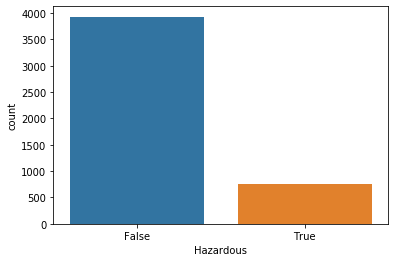

In [135]:
sns.countplot(x='Hazardous',data=df)

number of Hazardous asteroids are just more than 10 percent

In [136]:
#Since there is a lot of data duplication will first clean a little bit then explore further

In [137]:
df=df.drop(['Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)',
          'Est Dia in Feet(max)'],axis=1)
#droping multiple diameter values and keeping the value in M

In [138]:
df=df.drop(['Relative Velocity km per sec','Miles per hour','Miss Dist.(Astronomical)','Miss Dist.(lunar)',
            'Miss Dist.(miles)'],axis=1)

In [139]:
df=df.drop(['Neo Reference ID','Name','Close Approach Date','Epoch Date Close Approach','Orbit ID','Orbit Determination Date',
           'Equinox','Orbiting Body'],axis=1)

A heatmap and see the corrulation between different parameters

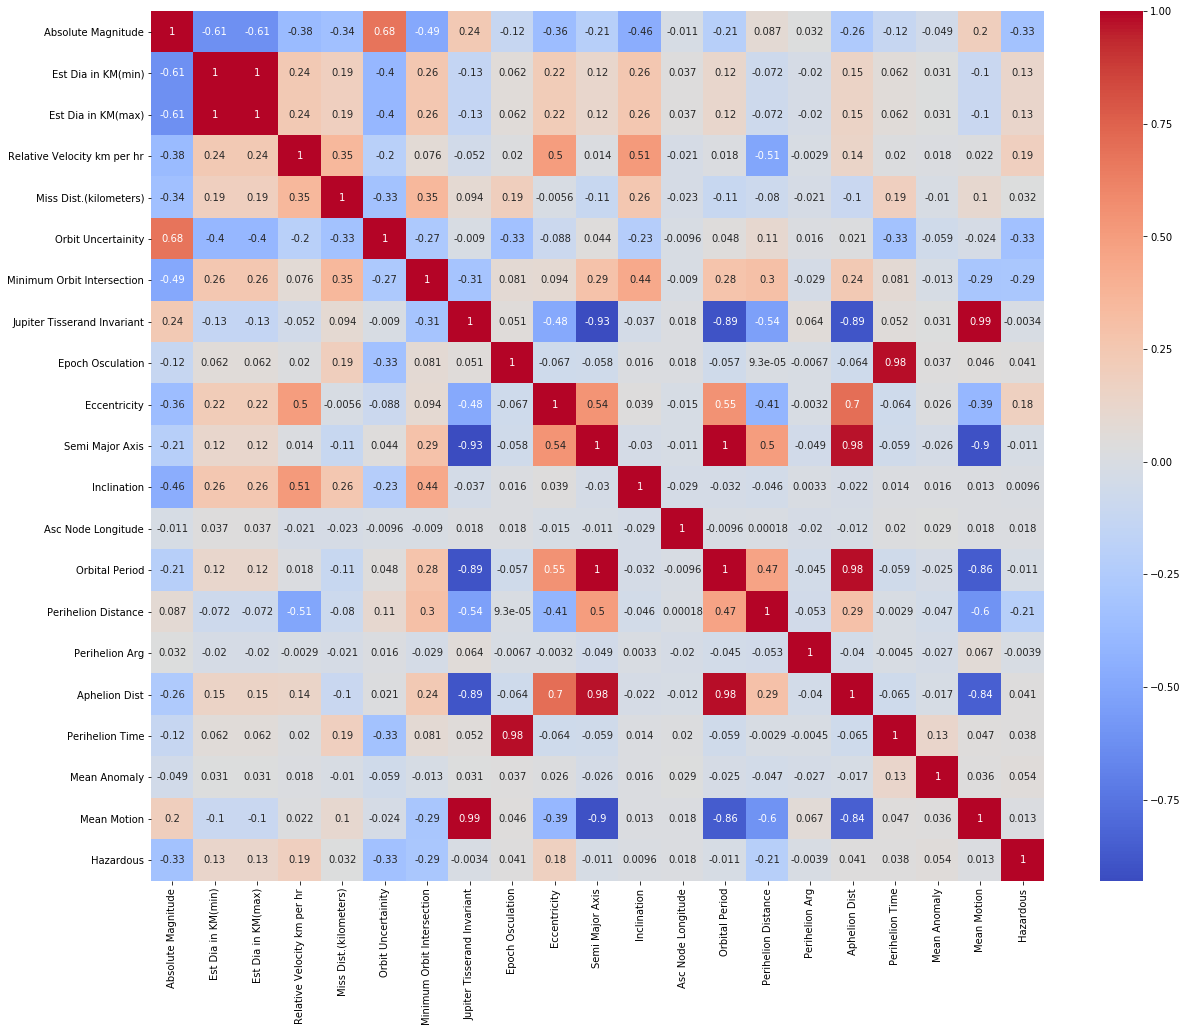

In [140]:
plt.figure(figsize=(20,16))
sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True)

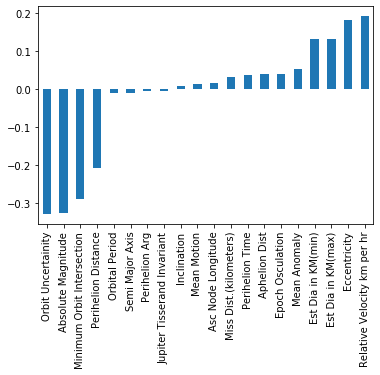

In [141]:
# To get a more clear picture
df.corr()['Hazardous'][:-1].sort_values().plot(kind='bar')

In [142]:
#Let us change the Hazardous values from Boolean expression to integers
df['Hazardous']=df['Hazardous'].astype(int)

In [143]:
df['Hazardous']

0       1
1       0
2       1
3       0
4       1
       ..
4682    0
4683    0
4684    0
4685    0
4686    0
Name: Hazardous, Length: 4687, dtype: int32

## Model Creation and Evaluation

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [145]:
X=df.drop('Hazardous',axis=1)
y=df['Hazardous']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [147]:
# MinMaxScaler to normalize the data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)

In [148]:
X_test=scaler.transform(X_test)

In [149]:
X_train[0]

array([0.36193619, 0.04808579, 0.04808579, 0.30529726, 0.36310079,
       0.11111111, 0.32372362, 0.55842595, 0.99734266, 0.55943527,
       0.10443429, 0.148685  , 0.35643331, 0.06269939, 0.29875461,
       0.99589863, 0.11301468, 0.9063865 , 0.73924136, 0.47544329])

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 

In [151]:
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {round(accuracy,2)}')

Accuracy: 99.72


In [152]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       0.98      1.00      0.99       219

    accuracy                           1.00      1407
   macro avg       0.99      1.00      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [153]:
confusion_matrix(y_test,predictions)

array([[1184,    4],
       [   1,  218]], dtype=int64)

Gradient Boosting Classifier

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
model_2= GradientBoostingClassifier()
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {round(accuracy,2)}')

Accuracy: 99.64


In [155]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       0.98      1.00      0.99       219

    accuracy                           1.00      1407
   macro avg       0.99      1.00      0.99      1407
weighted avg       1.00      1.00      1.00      1407



In [156]:
confusion_matrix(y_test,predictions)

array([[1184,    4],
       [   1,  218]], dtype=int64)

Both classifiers given same results in the dataset